In [8]:
# import tensorflow as tf
# from tensorflow import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
	      padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

############  Try to change the NN structure and parameters #####################
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', # padding='same', 
#                  input_shape=(28, 28, 1)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(32, kernel_size=(4, 4), activation='relu')) #, padding='same'))
# model.add(MaxPooling2D(pool_size=(2,2)))
####################################################################################

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start_time = datetime.now()

hist = model.fit(x_train, y_train,
                 batch_size=128, epochs=10, verbose=1, 
                 validation_data=(x_test, y_test))
print("\nTraining time = ", datetime.now() - start_time) 

Epoch 1/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2559 - accuracy: 0.9253 - val_loss: 0.0739 - val_accuracy: 0.9767
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0678 - accuracy: 0.9795 - val_loss: 0.0479 - val_accuracy: 0.9850
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.0418 - val_accuracy: 0.9854
Epoch 4/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0409 - accuracy: 0.9875 - val_loss: 0.0356 - val_accuracy: 0.9878
Epoch 5/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0496 - val_accuracy: 0.9838
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0366 - val_accuracy: 0.9884
Epoch 7/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0338 - val_accuracy:

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0414445661008358
Test accuracy: 0.9865000247955322


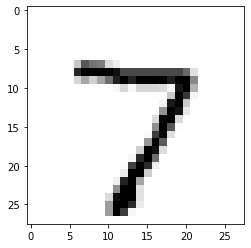

1/1 [==============================] - 0s 29ms/step
The Answer is  7


In [13]:
t = 0    # t번째 테스트 이미지
plt.imshow(x_test[t].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', np.argmax(model.predict(x_test[t:t+1])))

313/313 [==============================] - 1s 3ms/step


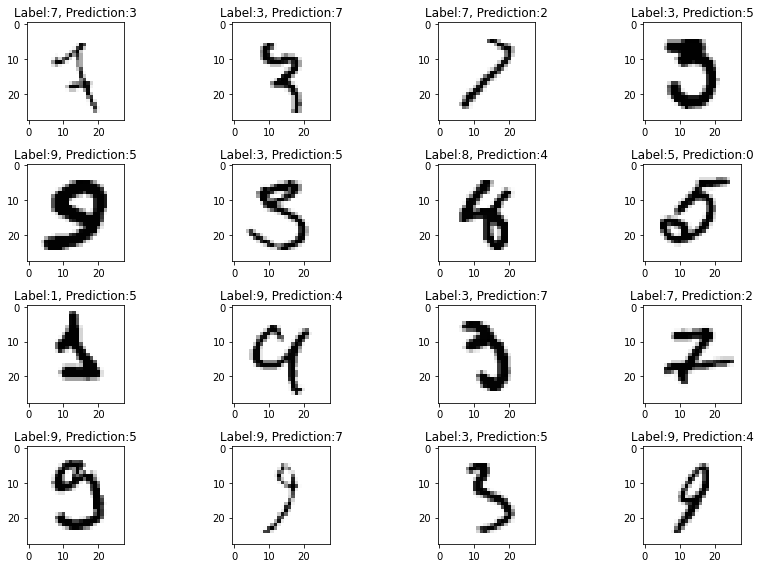

In [14]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)

wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = np.random.choice(wrong_result, 16,  replace=False)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()